In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#PREPROCESSING THE DATA
#we need to drop the image columns

df_books = pd.read_csv('Books.csv')
df_books = df_books.drop(columns = ['Image-URL-L', 'Image-URL-M', 'Image-URL-S'])
df_books.shape

C:\Users\rohit\AppData\Local\Temp\ipykernel_39128\2900524928.py:9: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')


(271360, 5)

In [2]:
df_ratings = pd.read_csv('Ratings.csv')
df_ratings.shape

(1149780, 3)

In [3]:
df_users = pd.read_csv('Users.csv')
df_users.shape

(278858, 3)

In [4]:
df_books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


In [5]:
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [6]:
df_users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [7]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [8]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [10]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [12]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

In [13]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [15]:
#Merging datasets
book_ratings = df_ratings.merge(df_books, on = "ISBN")
book_ratings.shape

(1031136, 7)

In [16]:
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [17]:
highly_rated = book_ratings[book_ratings['Book-Rating']>7]
highly_rated = highly_rated.sort_values(by ='Book-Rating', ascending = False)
highly_rated.head()


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
217894,229329,0553273914,10,The House of the Spirits,Isabel Allende,1986,Bantam Books
257793,2276,0446936383,10,The Tranquilizing of America,Richard Hughes,1980,Warner Books
257784,60319,0446890359,10,Without Feathers,Woody Allen,1981,Warner Books (Mm)
691743,35979,0452262496,10,Lust for Life,Irving Stone,1989,Plume Books
257767,2276,0446518220,10,Out in All Directions: Almanac of Gay and Lesb...,Lynn Witt,1995,Warner Books


In [18]:
highly_rated.shape

(223807, 7)

In [19]:
#Show the number of titles of books by their ratings
rating_avg=book_ratings.groupby('Book-Rating')['Book-Title'].count().reset_index().sort_values('Book-Rating', ascending=False).head(10).set_index('Book-Title')
rating_avg

,Book-Rating
Book-Title,
71225,10
60778,9
91804,8
66402,7
31687,6
45355,5
7617,4
5118,3
2375,2


In [20]:
num_ratings = book_ratings.groupby('Book-Title')['Book-Rating'].count()
num_ratings

Book-Title
 A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)    4
 Always Have Popsicles                                                                                        1
 Apple Magic (The Collector's series)                                                                         1
 Ask Lily (Young Women of Faith: Lily Series, Book 5)                                                         1
 Beyond IBM: Leadership Marketing and Finance for the 1990s                                                   1
                                                                                                             ..
Ã?Â?lpiraten.                                                                                                 2
Ã?Â?rger mit Produkt X. Roman.                                                                                4
Ã?Â?sterlich leben.                                                                          

In [21]:
book_ratings.insert(4, "Total-no-Ratings", num_ratings)
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total-no-Ratings,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,Flesh Tones: A Novel,NaN,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,NaN,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,NaN,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,NaN,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,NaN,M. J. Rose,2002,Ballantine Books


In [22]:
book_ratings.shape

(1031136, 8)

In [23]:
book_ratings = book_ratings[book_ratings['User-ID'].map(book_ratings['User-ID'].value_counts()) > 100]
book_ratings = book_ratings[book_ratings['Book-Title'].map(book_ratings['Book-Title'].value_counts()) > 100]
book_ratings = book_ratings.reset_index(drop = True)
book_ratings.shape


(45305, 8)

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

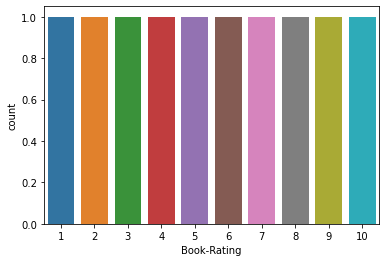

In [24]:
sns.countplot(data = rating_avg, x = 'Book-Rating')

In [50]:
def popularity_based_system(df_books, n):
    
    df_bookrating = highly_rated.groupby('Book-Title').count()['Book-Rating'].reset_index()
    df_bookrating.rename(columns={'Book-Rating':'Total-Ratings'},inplace=True)
    
    df_rating_avg = highly_rated.groupby('Book-Title').count()['Book-Rating'].reset_index()
    df_rating_avg.rename(columns={'Book-Rating':'Rating-Average'},inplace=True)
    
    popular_books = df_bookrating.merge(df_rating_avg, on = 'Book-Title')
    
    def weighted_avg(x):
            v = x['Total-Ratings']
            R = x['Rating-Average']
                
            return ((v * R) + (m*C))/(v+m) #I used imdb weighted average equation

    C = popular_books['Rating-Average'].mean()
    m = popular_books['Total-Ratings'].min()
    
    popular_books = popular_books[popular_books['Total-Ratings'] >= m]
    
    popular_books['Polularity-Score'] = popular_books.apply(weighted_avg,axis=1)
    
    popular_books = popular_books.sort_values(by='Polularity-Score',ascending=False)

    return popular_books[['Book-Title','Rating-Average','Total-Ratings','Polularity-Score']].reset_index(drop=True).head(n)


print("Top 50 popular books")
display(popularity_based_system(df_books , 50))

Top 50 popular books


,Book-Title,Rating-Average,Total-Ratings,Polularity-Score
0,The Lovely Bones: A Novel,515,515,514.006775
1,The Da Vinci Code,380,380,379.009176
2,The Secret Life of Bees,327,327,326.010658
3,The Red Tent (Bestselling Backlist),278,278,277.012530
4,Harry Potter and the Chamber of Secrets (Book 2),278,278,277.012530
5,Harry Potter and the Sorcerer's Stone (Harry P...,278,278,277.012530
6,Life of Pi,248,248,247.014040
7,Harry Potter and the Prisoner of Azkaban (Book 3),237,237,236.014689
8,To Kill a Mockingbird,235,235,234.014813
9,Harry Potter and the Goblet of Fire (Book 4),225,225,224.015469
